In [107]:
import os

import numpy as np
import pandas as pd
from plotnine import *
%matplotlib inline


test_suite = 'number_src'

txtfile = 'SyntaxGym_test_suites/txt/'+ test_suite +'.txt'
with open(txtfile) as f:
    sentences = [l.strip() for l in f]

def diffs_from_npz(npzfile): 
    npzfile = np.load(npzfile)
    pmidict=dict(zip(sentences,npzfile.values()))

    diffs = list()
    for i in range(0,76,2):
        match = pmidict[sentences[i]][1][6]+pmidict[sentences[i]][6][1]
        mismatch = pmidict[sentences[i+1]][1][6]+pmidict[sentences[i+1]][6][1]
        diffs.append(match-mismatch)
#         print(i,f'{match:7.4} - {mismatch:7.4} = {match-mismatch:7.4}')
    return diffs

# get pmi matrices that were estimated by the models
entrylist = [entry for entry in os.scandir("results-azure/SyntaxGym/") 
             if os.path.isdir(entry)]
dirlist = [entry.path for entry in entrylist]
modellist = [entry.name.split("_")[1] for entry in entrylist]
npzfilelist = [x + "/pmi_matrices/number_src.npz" for x in dirlist]
model_to_matrix = {i:diffs_from_npz(npzfile) for i,npzfile in zip(modellist,npzfilelist)}

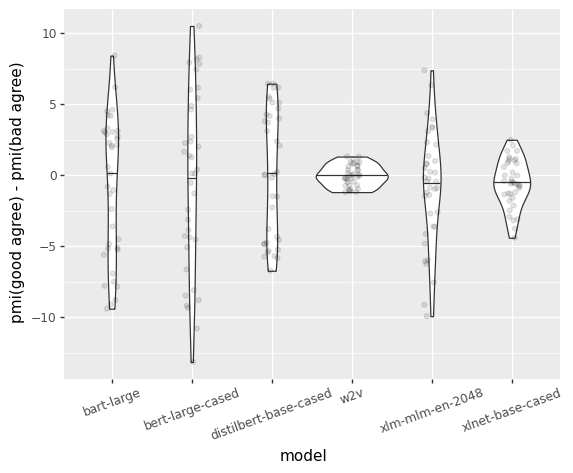

<ggplot: (323208729)>

In [156]:
df = pd.DataFrame.from_dict(model_to_matrix)
df = pd.melt(df,var_name="model", value_name="pmi(good agree) - pmi(bad agree)")
(ggplot(df,aes(x='model',y='pmi(good agree) - pmi(bad agree)')) +
 geom_violin(draw_quantiles=0.5) + geom_jitter(width=0.1,alpha=0.1) +
 theme(axis_text_x = element_text(angle=20))
)

In [235]:
def acc_from_npz(npzfile): 
    npzfile = np.load(npzfile)
    pmidict=dict(zip(sentences,npzfile.values()))

    accs = list()
    for i in range(0,76,4):
        match_sing = np.argmax(pmidict[sentences[i]][1])==6 or np.argmax(pmidict[sentences[i]][6])==1
        mismatch_sing = np.argmax(pmidict[sentences[i+1]][1])==6 or np.argmax(pmidict[sentences[i+1]][6])==1
        match_pl = np.argmax(pmidict[sentences[i+2]][1])==6 or np.argmax(pmidict[sentences[i+2]][6])==1
        mismatch_pl = np.argmax(pmidict[sentences[i+3]][1])==6 or np.argmax(pmidict[sentences[i+3]][6])==1
        accs.append([match_sing,mismatch_sing,match_pl,mismatch_pl])
    return(accs)

# get pmi matrices that were estimated by the models
entrylist = [entry for entry in os.scandir("results-azure/SyntaxGym/") 
             if os.path.isdir(entry)]
dirlist = [entry.path for entry in entrylist]
modellist = [entry.name.split("_")[1] for entry in entrylist]
npzfilelist = [x + "/pmi_matrices/number_src.npz" for x in dirlist]
model_to_acc = {i:acc_from_npz(npzfile) for i,npzfile in zip(modellist,npzfilelist)}

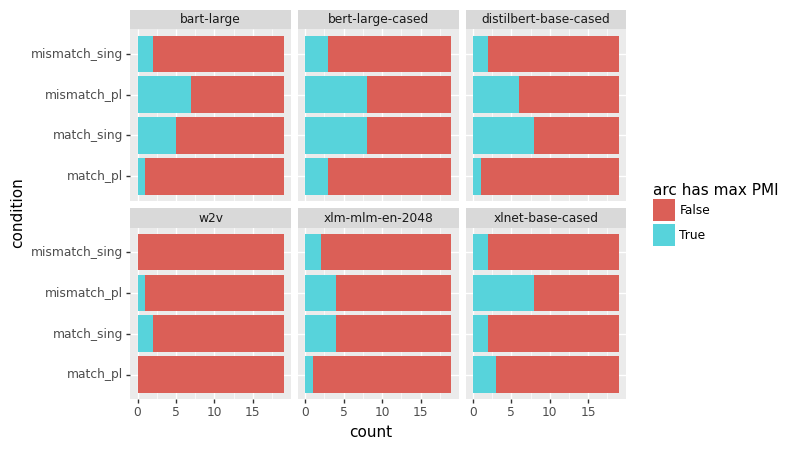

<ggplot: (321089477)>

In [289]:
accdf = pd.DataFrame.from_dict(model_to_acc)
accdf= pd.melt(accdf,var_name="model", value_name="acc")
accdf[['match_sing','mismatch_sing','match_pl','mismatch_pl']] = pd.DataFrame(accdf.acc.tolist(), index=accdf.index)
accdf = accdf.drop(columns=["acc"])
accdf = pd.melt(accdf, id_vars= ["model"], var_name="condition", value_name="arc has max PMI")
(ggplot(accdf,aes(x="condition",fill="arc has max PMI")) +
 geom_bar() + facet_wrap('~ model') +
 coord_flip()
)

-----------

In [290]:
import json

In [291]:
with open('SyntaxGym_test_suites/json/number_src.json','r') as f:
    data1 = json.load(f)
with open('SyntaxGym_test_suites/number_src.json','r') as f:
    data2 = json.load(f)
print(data1.keys())
print(data2.keys())

FileNotFoundError: [Errno 2] No such file or directory: 'SyntaxGym_test_suites/number_src.json'

In [292]:
data1['meta']

{'name': 'number_src',
 'metric': 'sum',
 'comment': '',
 'reference': '',
 'author': ''}

In [294]:
data1['items'][1]

{'item_number': 2,
 'conditions': [{'condition_name': 'match_sing',
   'regions': [{'region_number': 1, 'content': 'The'},
    {'region_number': 2, 'content': 'pilot'},
    {'region_number': 3, 'content': 'that'},
    {'region_number': 4, 'content': 'injured'},
    {'region_number': 5, 'content': 'the'},
    {'region_number': 6, 'content': 'teachers'},
    {'region_number': 7, 'content': 'brings'},
    {'region_number': 8, 'content': 'love to people'}]},
  {'condition_name': 'mismatch_sing',
   'regions': [{'region_number': 1, 'content': 'The'},
    {'region_number': 2, 'content': 'pilot'},
    {'region_number': 3, 'content': 'that'},
    {'region_number': 4, 'content': 'injured'},
    {'region_number': 5, 'content': 'the'},
    {'region_number': 6, 'content': 'teachers'},
    {'region_number': 7, 'content': 'bring'},
    {'region_number': 8, 'content': 'love to people'}]},
  {'condition_name': 'mismatch_plural',
   'regions': [{'region_number': 1, 'content': 'The'},
    {'region_numbe

In [296]:
for item in data1["items"]:
    print(item['item_number'],[item['conditions'][x]["condition_name"] for x in range(len(item['conditions']))])

1 ['match_sing', 'mismatch_sing', 'match_plural', 'mismatch_plural']
2 ['match_sing', 'mismatch_sing', 'mismatch_plural', 'match_plural']
3 ['match_sing', 'mismatch_sing', 'mismatch_plural', 'match_plural']
4 ['match_sing', 'mismatch_sing', 'mismatch_plural', 'match_plural']
5 ['match_sing', 'mismatch_sing', 'mismatch_plural', 'match_plural']
6 ['match_sing', 'mismatch_sing', 'mismatch_plural', 'match_plural']
7 ['match_sing', 'mismatch_sing', 'mismatch_plural', 'match_plural']
8 ['match_sing', 'mismatch_sing', 'mismatch_plural', 'match_plural']
9 ['match_sing', 'mismatch_sing', 'mismatch_plural', 'match_plural']
10 ['match_sing', 'mismatch_sing', 'mismatch_plural', 'match_plural']
11 ['match_sing', 'mismatch_sing', 'mismatch_plural', 'match_plural']
12 ['match_sing', 'mismatch_sing', 'mismatch_plural', 'match_plural']
13 ['match_sing', 'mismatch_sing', 'mismatch_plural', 'match_plural']
14 ['match_sing', 'mismatch_sing', 'mismatch_plural', 'match_plural']
15 ['match_sing', 'mismatch_s